<a href="https://colab.research.google.com/github/Omar-Ouardighi/Steam-Optimization-and-Other-Oddities/blob/main/Steam_Optimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import mutual_info_regression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [15]:
train_df = pd.read_csv('/content/train(2).csv', parse_dates=['SURV_DTE'])
test_df = pd.read_csv('/content/test_data(1).csv')
sub = pd.read_csv('/content/submission_sample(1).csv')
print(train_df.shape, test_df.shape)
train_df.head()

(8004, 20) (1504, 17)


,CMPL_FAC_ID,SAND,SURV_DTE,DIP,AVG_ORIG_OIL_SAT,ORIG_OIL_H,RMNG_OIL_H,GAS_H,TOTAL_INJ,TOTAL_GNTL_INJ,Lin_Dist_Inj_Factor,SGMT_CUM_STM_INJ_1,FT_DIST_PAT_1,SGMT_CUM_STM_INJ_2,FT_DIST_PAT_2,SGMT_CUM_STM_INJ_3,FT_DIST_PAT_3,TOTAL_PROD,Lin_Dist_Prod_Factor,PCT_DESAT_TO_ORIG
0,435,TULS_D1,2012-10-25,0.05,0.7,21.06,0.00,21.06,1.246190e+08,3164720,0.269,NaN,NaN,551231.0,372.0,942465.0,465.0,8904160,0.410639,1.00
1,435,TULS_D1,2016-09-02,0.05,0.7,21.06,0.00,21.06,1.791845e+08,4085829,0.302,NaN,NaN,963379.0,372.0,994686.0,465.0,18796208,0.380935,1.00
2,435,TULS_D2,1990-01-01,0.06,0.7,14.58,14.58,0.00,0.000000e+00,0,0.218,0.0,NaN,0.0,NaN,0.0,465.0,0,0.410639,0.00
3,435,TULS_D2,2012-10-25,0.06,0.7,14.58,3.00,11.58,1.246190e+08,511013,0.218,NaN,NaN,NaN,NaN,232391.0,465.0,8904160,0.410639,0.79
4,435,TULS_D2,2016-09-02,0.06,0.7,14.58,0.00,14.58,1.791845e+08,880407,0.229,NaN,NaN,NaN,NaN,416613.0,465.0,18796208,0.380935,1.00


# Exploration Data Analysis


In [3]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8004 entries, 0 to 8003
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CMPL_FAC_ID           8004 non-null   int64  
 1   SAND                  8004 non-null   object 
 2   SURV_DTE              8004 non-null   object 
 3   DIP                   8004 non-null   float64
 4   AVG_ORIG_OIL_SAT      8004 non-null   float64
 5   ORIG_OIL_H            8004 non-null   float64
 6   RMNG_OIL_H            8004 non-null   float64
 7   GAS_H                 8004 non-null   float64
 8   TOTAL_INJ             8004 non-null   float64
 9   TOTAL_GNTL_INJ        8004 non-null   int64  
 10  Lin_Dist_Inj_Factor   7781 non-null   float64
 11  SGMT_CUM_STM_INJ_1    6123 non-null   float64
 12  FT_DIST_PAT_1         5896 non-null   float64
 13  SGMT_CUM_STM_INJ_2    5750 non-null   float64
 14  FT_DIST_PAT_2         5505 non-null   float64
 15  SGMT_CUM_STM_INJ_3   

(array([4335.,  404.,  439.,  284.,  269.,  305.,  276.,  230.,  223.,
        1239.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

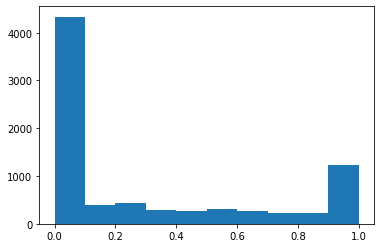

In [4]:
plt.hist(train_df.PCT_DESAT_TO_ORIG)

In [19]:
train_df.isna().sum()

CMPL_FAC_ID                0
SAND                       0
SURV_DTE                   0
DIP                        0
AVG_ORIG_OIL_SAT           0
ORIG_OIL_H                 0
RMNG_OIL_H                 0
GAS_H                      0
TOTAL_INJ                  0
TOTAL_GNTL_INJ             0
Lin_Dist_Inj_Factor      223
SGMT_CUM_STM_INJ_1      1881
FT_DIST_PAT_1           2108
SGMT_CUM_STM_INJ_2      2254
FT_DIST_PAT_2           2499
SGMT_CUM_STM_INJ_3      2239
FT_DIST_PAT_3           2498
TOTAL_PROD                 0
Lin_Dist_Prod_Factor       1
PCT_DESAT_TO_ORIG          0
dtype: int64

# PREPROCESSING

In [22]:
train_df = train_df.fillna(0)
main_cols = train_df.columns.difference(['GAS_H','RMNG_OIL_H','CMPL_FAC_ID', 'PCT_DESAT_TO_ORIG','SURV_DTE'])
X = train_df[main_cols]
y = train_df.PCT_DESAT_TO_ORIG

## Label Encoding

In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
X['SAND']=le.fit_transform(X['SAND'])

## Modeling

In [34]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [35]:
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [36]:
y_pred = model.predict(X_test)

In [37]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_pred, squared=False)
mse

0.24589515078181948

In [38]:
# Helper function for plotting feature importance
def plot_features(columns, importances, n=20):
    df = (pd.DataFrame({"features": columns,
                        "feature_importance": importances})
          .sort_values("feature_importance", ascending=False)
          .reset_index(drop=True))
    
    sns.barplot(x="feature_importance",
                y="features",
                data=df[:n],
                orient="h")

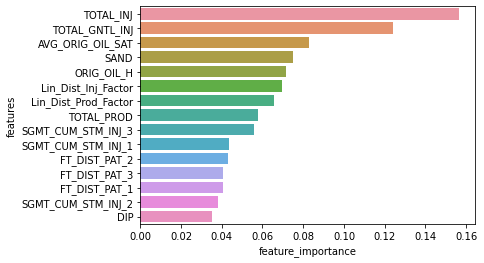

In [41]:
plot_features(X_train.columns, model.feature_importances_)